In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from myhdl import *

from src.utils import IQdata, RTLblocks
from src.Decimator import Decimator

## Test decimate() function for floating point

Average power of input signal is 1.2551923036636485
Maximum value of input is 1.5
Average power of decimated signal is 1.2434851598999914
Maximum value of decimated signal is 1.4994010985985418


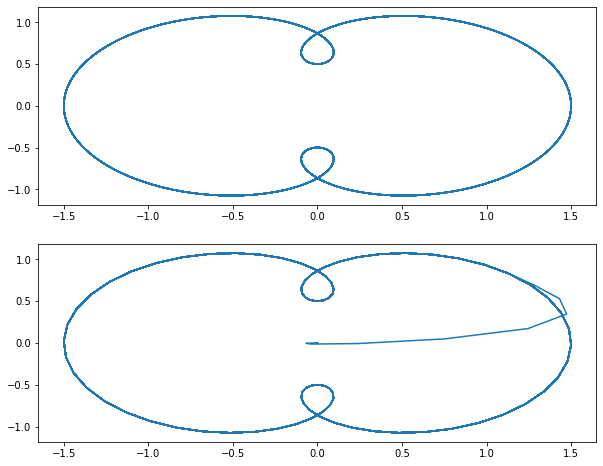

In [2]:
decF = 4
nFilt = decF * 16
filt = signal.firwin2(nFilt, [0., 1/4/decF, 1/2/decF, 1.], [1., 1., 0., 0.])
filt = filt / np.sum(filt)
w, h = signal.freqz(filt, 4096)
# plt.plot(w/np.pi, 20*np.log10(np.abs(h)/np.max(np.abs(h))));
# plt.xlim(0, 0.2);
sigType = complex

dec = Decimator(filt, decF, dtype=sigType)

if sigType == float:
    sig = np.cos(2*np.pi*.05/16*np.arange(5000)) + .5*np.cos(2*np.pi*3*.05/16*np.arange(5000))
else:
    sig = np.exp(1j*2*np.pi*.05/16*np.arange(5000)) + .5*np.exp(1j*2*np.pi*3*.05/16*np.arange(5000))
    
sigDec = np.array([y for y in [dec.decimate(x) for x in sig] if y != None])

plotSpec = False
print('Average power of input signal is', np.mean(np.abs(sig)**2))
print('Maximum value of input is', np.max(np.hstack((sig.real, sig.imag))))
print('Average power of decimated signal is', np.mean(np.abs(sigDec)**2))
print('Maximum value of decimated signal is', np.max(np.hstack((sigDec.real, sigDec.imag))))

plt.subplots(2, 1, figsize=(10, 8))
plt.subplot(211)
if plotSpec:
    freqs1 = np.fft.fftshift(np.fft.fftfreq(len(sig), 1/16))
    spec1 = 2. / len(sig)**2 * np.fft.fftshift(np.abs(np.fft.fft(sig))**2)
    plt.plot(freqs1, spec1);
    plt.xlim(0, .5);
else:
    if sigType == float:
        plt.plot(sig);
    else:
        plt.plot(sig.real, sig.imag);
plt.subplot(212)
if plotSpec:
    freqs2 = np.fft.fftshift(np.fft.fftfreq(len(sigDec), 1/16*decF))
    spec2 = 2. / len(sigDec)**2 * np.fft.fftshift(np.abs(np.fft.fft(sigDec))**2)
    plt.plot(freqs2, spec2);
    plt.xlim(0, .5);
else:
    if sigType == float:
        plt.plot(sigDec);
    else:
        plt.plot(sigDec.real, sigDec.imag);

## Test decimate() for integer

Average power of input signal is 2291017.3968
Maximum value of input is 2027.0
Average power of decimated signal is 2269464.5296
Maximum value of decimated signal is 2025.0


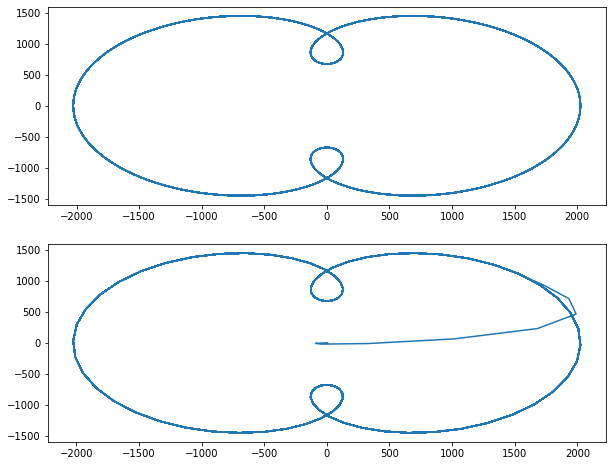

In [3]:
# integer version
dec.setImpl(('int', 16))
filtInt = np.round(filt * 2**15)
dec.reset()
sigSc = 12
sigNorm =  .99 * sig / max(sig) * (2**(sigSc-1)-1) / (2**(sigSc-1))
sigInt = np.round(sigNorm * 2**(sigSc-1))
sigDecInt = np.array([y for y in [dec.decimate(x) for x in sigInt] if y != None])

plotSpec = False
print('Average power of input signal is', np.mean(np.abs(sigInt)**2))
print('Maximum value of input is', np.max(np.hstack((sigInt.real, sigInt.imag))))
print('Average power of decimated signal is', np.mean(np.abs(sigDecInt)**2))
print('Maximum value of decimated signal is', np.max(np.hstack((sigDecInt.real, sigDecInt.imag))))

plt.subplots(2, 1, figsize=(10, 8))
plt.subplot(211)
if plotSpec:
    freqs1 = np.fft.fftshift(np.fft.fftfreq(len(sigInt), 1/16))
    spec1 = 2. / len(sigInt)**2 * np.fft.fftshift(np.abs(np.fft.fft(sigInt))**2)
    plt.plot(freqs1, spec1);
    plt.xlim(0, .5);
else:
    if sigType == float:
        plt.plot(sigInt);
    else:
        plt.plot(sigInt.real, sigInt.imag);
plt.subplot(212)
if plotSpec:
    freqs2 = np.fft.fftshift(np.fft.fftfreq(len(sigDecInt), 1/16*decF))
    spec2 = 2. / len(sigDecInt)**2 * np.fft.fftshift(np.abs(np.fft.fft(sigDecInt))**2)
    plt.plot(freqs2, spec2);
    plt.xlim(0, .5);
else:
    if sigType == float:
        plt.plot(sigDecInt);
    else:
        plt.plot(sigDecInt.real, sigDecInt.imag);

## Test RTL blocks

## Test decimator rtl-model

In [4]:
dec.reset()
decFmax = 16

tb = dec.test_rtl(sigInt, sigSc, decFmax, wrToFile=True)
tb.config_sim(trace=False)
tb.run_sim()

 **** Test passed **** 


In [5]:
dW = 12
dec.convert(dW=dW, decFmax=decFmax)

C:\Anaconda3\envs\myHDLenv\lib\site-packages\myhdl\conversion\_toVHDL.py:468: ToVHDLWarning: Signal is driven but not read: cBank
  category=ToVHDLWarning
